# Get dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./dataset', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


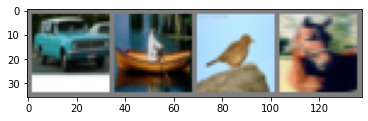

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# Define image processing methods

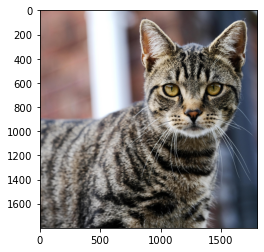

In [5]:
from PIL import Image
import numpy as np
import cv2 as cv

def load_img(file='dataset/cat.jpg'):
    cat = Image.open(file)
    return np.asarray(cat)

def display_img(arr, title=""):
    plt.title(title)
    plt.imshow(arr, cmap='gray')
    plt.show()
    
img = load_img()
display_img(img)

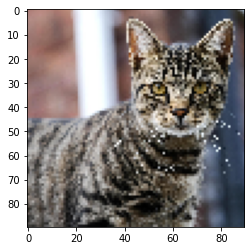

In [6]:
def resize_img(arr, scale_x=0.1, scale_y=0.1):
    return cv.resize(arr,None,fx=scale_x, fy=scale_y, interpolation = cv.INTER_CUBIC)

img = load_img()
display_img(resize_img(img, 0.05, 0.05))

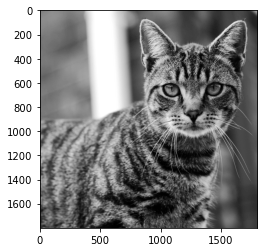

In [7]:
def grayscale_img(arr):
    return cv.cvtColor(arr, cv.COLOR_BGR2GRAY)

img = load_img()
display_img(grayscale_img(img))

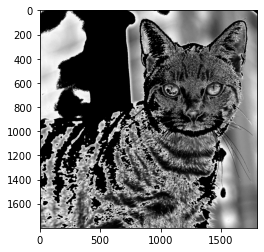

In [69]:
def threshold_img(arr, lower, upper):
    if len(arr.shape) == 3:
        arr = grayscale_img(arr)
    _, arr = cv.threshold(arr, lower, upper, cv.THRESH_TOZERO_INV)
    return arr

img = load_img()
display_img(threshold_img(img, lower=127, upper=255))

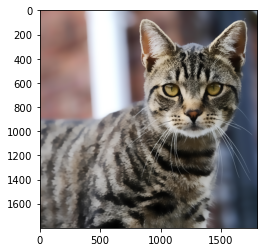

In [9]:
def blur_img(arr, kernel=5):
    return cv.bilateralFilter(arr, kernel, 75, 75)

img = load_img()
display_img(blur_img(img, kernel=50))

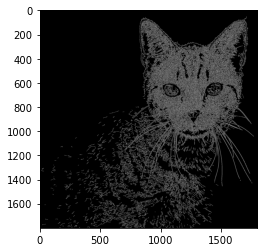

In [28]:
def canny_img(arr, sigma=0.33):
    m = np.median(arr)
    lower = int(max(0, (1.0 - sigma) * m))
    upper = int(min(255, (1.0 + sigma) * m))
    return cv.Canny(arr, lower, upper)

img = load_img()
display_img(canny_img(img, sigma=0.3))

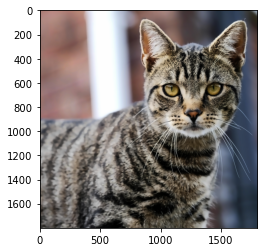

In [11]:
def denoise_img(arr):
    if len(arr.shape) == 2:
        arr = cv.fastNlMeansDenoising(arr, None, 10, 7, 21)
    elif len(arr.shape) == 3:
        arr = cv.fastNlMeansDenoisingColored(arr, None, 10, 10, 7, 21)
    return arr

img = load_img()
# img = grayscale_img(img)
display_img(denoise_img(img))

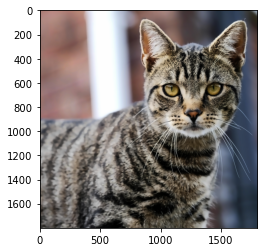

In [12]:
def denoise_img(arr):
    return cv.fastNlMeansDenoisingColored(arr, None, 10, 10, 7, 21)

img = load_img()
display_img(denoise_img(img))

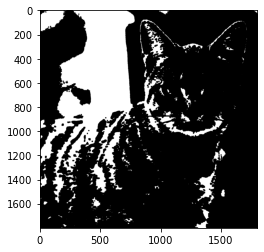

In [13]:
def erode_img(arr, itr=2):
    kernel = np.ones((5,5), np.uint8)
    return cv.erode(arr, kernel, iterations=itr)

img = load_img()
img = threshold_img(img, thr=127)
display_img(erode_img(img, itr=2))

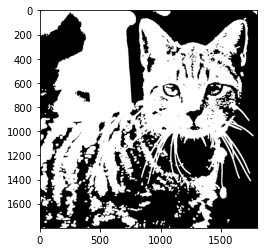

In [14]:
def dilate_img(arr, itr=2):
    kernel = np.ones((5,5), np.uint8)
    return cv.dilate(arr, kernel, iterations=itr)

img = load_img()
img = threshold_img(img, thr=127)
display_img(dilate_img(img, itr=2))

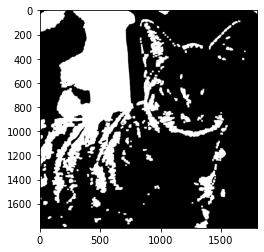

In [15]:
def open_img(arr, itr=2):
    arr = erode_img(arr, itr=itr)
    arr = dilate_img(arr, itr=itr)
    return arr

img = load_img()
img = threshold_img(img, thr=127)
display_img(open_img(img, itr=3))

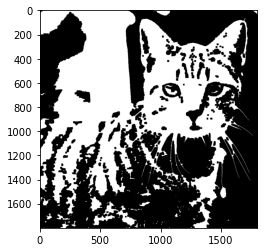

In [16]:
def close_img(arr, itr=2):
    arr = dilate_img(arr, itr=itr)
    arr = erode_img(arr, itr=itr)
    return arr

img = load_img()
img = threshold_img(img, thr=127)
display_img(close_img(img, itr=3))

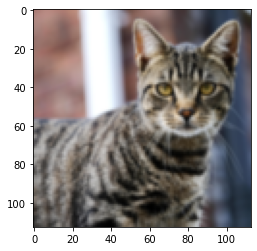

In [17]:
def downres_img(arr, itr=1):
    for _ in range(itr):
        arr = cv.pyrDown(arr)
    return arr
    
img = load_img()
display_img(downres_img(img, itr=4))

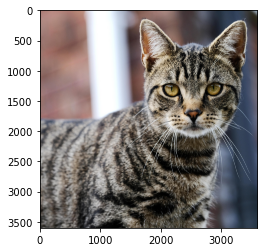

In [18]:
def upres_img(arr, itr=1):
    for _ in range(itr):
        arr = cv.pyrUp(arr)
    return arr

img = load_img()
display_img(upres_img(img, itr=1))

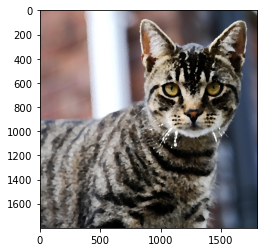

In [23]:
# source: https://towardsdatascience.com/painting-and-sketching-with-opencv-in-python-4293026d78b
def oilpaint_img(arr):
    return cv.xphoto.oilPainting(arr, 7, 1)

img = load_img()
display_img(oilpaint_img(img))

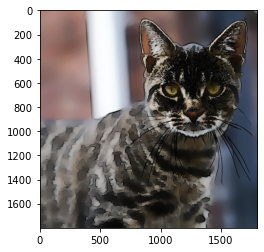

In [32]:
def watercolor_img(arr, size=60, color=0.6):
    return cv.stylization(arr, sigma_s=size, sigma_r=color)

img = load_img()
display_img(watercolor_img(img))

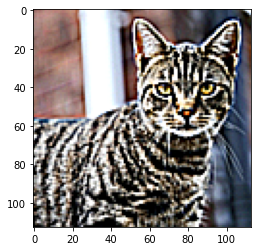

In [80]:
def sharpen_img(arr):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv.filter2D(arr, -1, kernel)

img = load_img()
img = downres_img(img, itr=4)
display_img(sharpen_img(img))

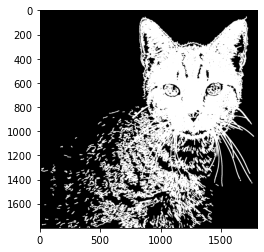

In [37]:
def discrete_img(arr):
    arr[arr > 0] = 1
    return arr

img = load_img()
img = canny_img(img)
img = blur_img(img)
img = discrete_img(img)
display_img(img)

# Construct doodler

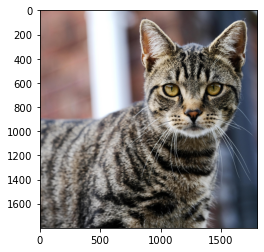

In [23]:
from img_proc import *

def doodle_img(arr, fn=[]):
    x, y = arr.shape[1], arr.shape[0]
    arr = resize_img(arr, scale_x=int(1800/x), scale_y=int(1800/y))
    for f in fn:
        arr = f(arr)
        # print(f)
        display_img(arr)
    return arr
    
img = load_img()
display_img(img)

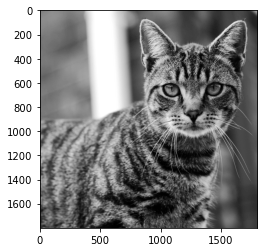

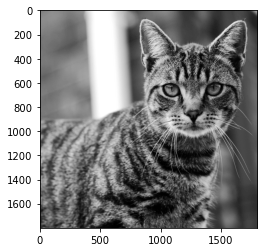

In [44]:
from functools import partial

fn = [    
]

img = load_img()
img = grayscale_img(img)
display_img(img)
img = doodle_img(img, fn)
display_img(img)

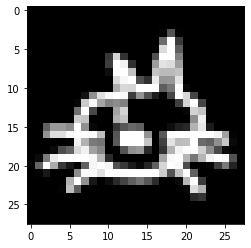

In [30]:
cat = np.load('dataset/quickdraw/cat.npy')
display_img(cat[0].reshape((28,28)))

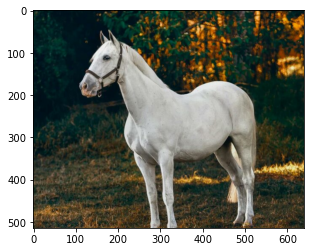

In [45]:
img = load_img('dataset/horse.jpg')
display_img(img)